## 1.Notebook Preparation

In [1]:
"""
Preparation of needed libraries and plot parameters
"""



%matplotlib inline
%load_ext watermark
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

%watermark -a 'Ethen' -d -t -v -p numpy,scipy,pandas,matplotlib,sklearn

# setup the look and feel of the notebook
plt.rcParams['figure.figsize'] = 8, 6
sns.set_context('notebook', font_scale = 1.5, rc = {'lines.linewidth': 2.5})
sns.set_style('whitegrid', {'grid.linestyle': '--', 'color':"#F2CC38"})

# Create a couple of colors to use throughout the notebook
red  = sns.xkcd_rgb['vermillion']
blue = sns.xkcd_rgb['dark sky blue']

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 15})



Author: Ethen

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 8.4.0

numpy     : 1.21.5
scipy     : 1.7.3
pandas    : 1.5.2
matplotlib: 3.5.2
sklearn   : 1.1.1



## 2. Data upload

In [2]:
#Loading both datasets

test_df = pd.read_csv('../Jupyter Notebook/data/test.csv')
test = test_df.copy()

train_df = pd.read_csv('../Jupyter Notebook/data/train.csv')
train = train_df.copy()

In [3]:
#displaying first 5 rows of test dataset
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [4]:
# Looking for a null values
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
#displaying first 5 rows of train dataset
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## 3. Initial Data Exploration

In [6]:
def initial_eda(df):
    """
    Just because I am lazy I use this easy function to print some params that could be a one function :) 
    """
    return print('Shape of Your Dataset is ' + str(df.shape[0]) + ' rows and ' + str(df.shape[1]) + ' columns  \n'
                'Overall Dataset size is ' + str(df.size) + ' and has ' + str(df.duplicated().sum()) + ' duplicates')

In [7]:
initial_eda(train)

Shape of Your Dataset is 891 rows and 12 columns  
Overall Dataset size is 10692 and has 0 duplicates


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [13]:
train.corr()

/var/folders/fj/_tf9b_g17230_2glmsbl3zr80000gp/T/ipykernel_3529/2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

PassengerId


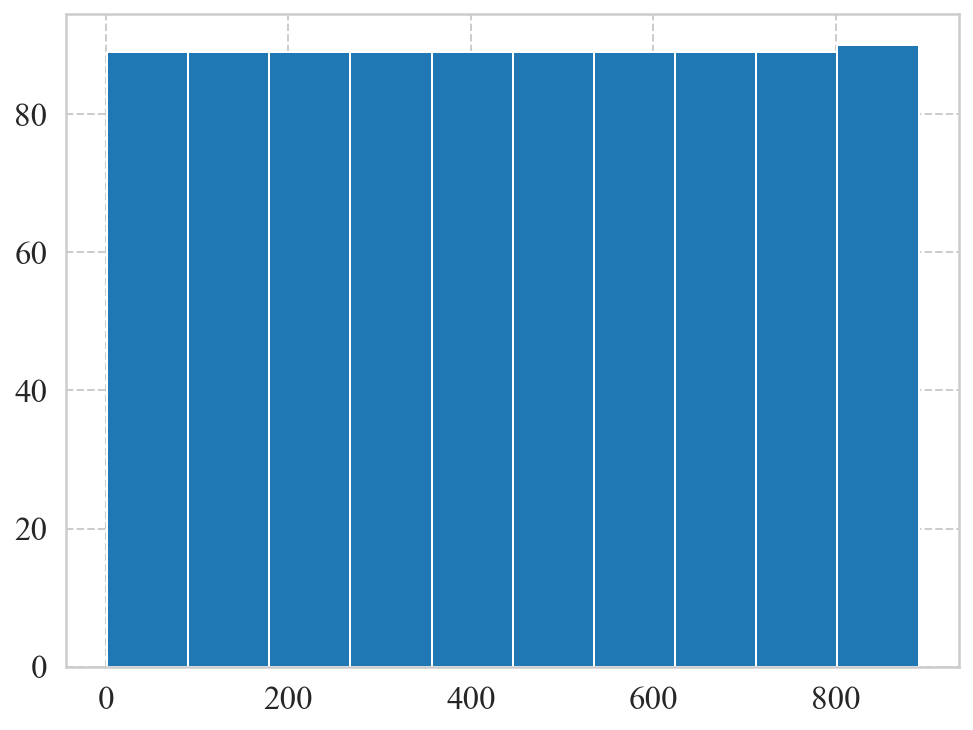

Survived


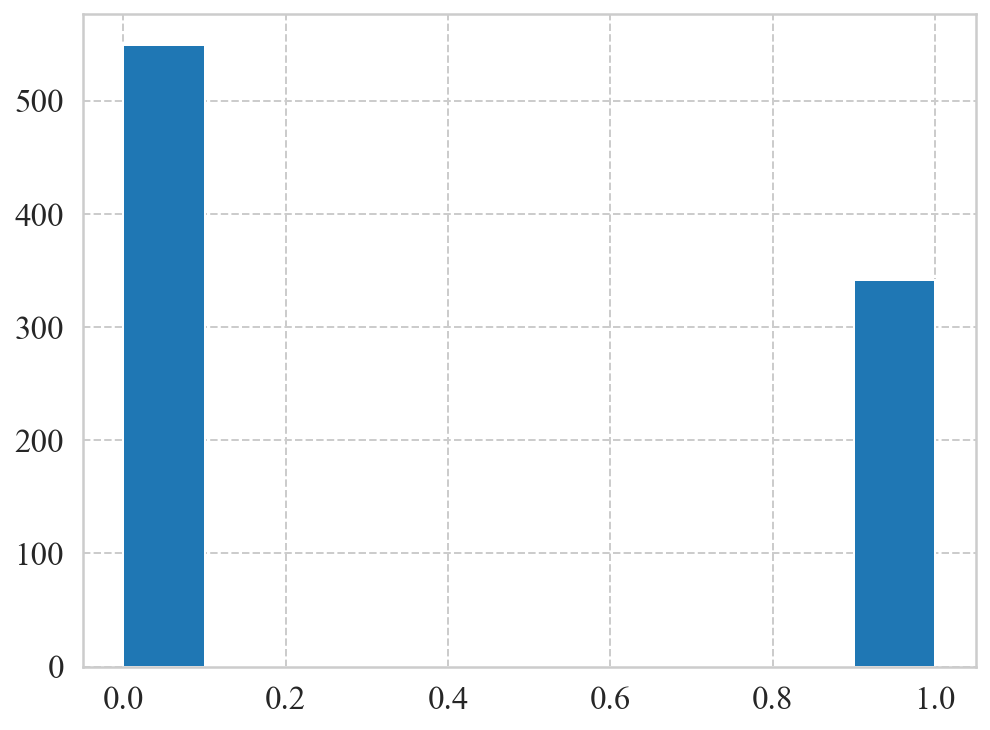

Pclass


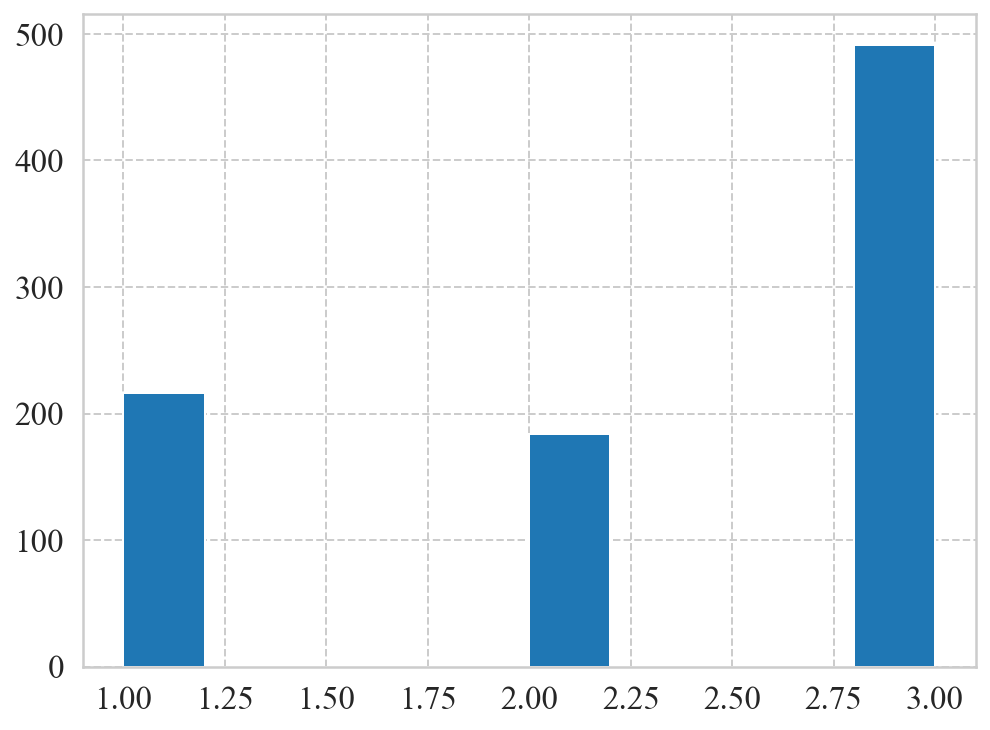

Age


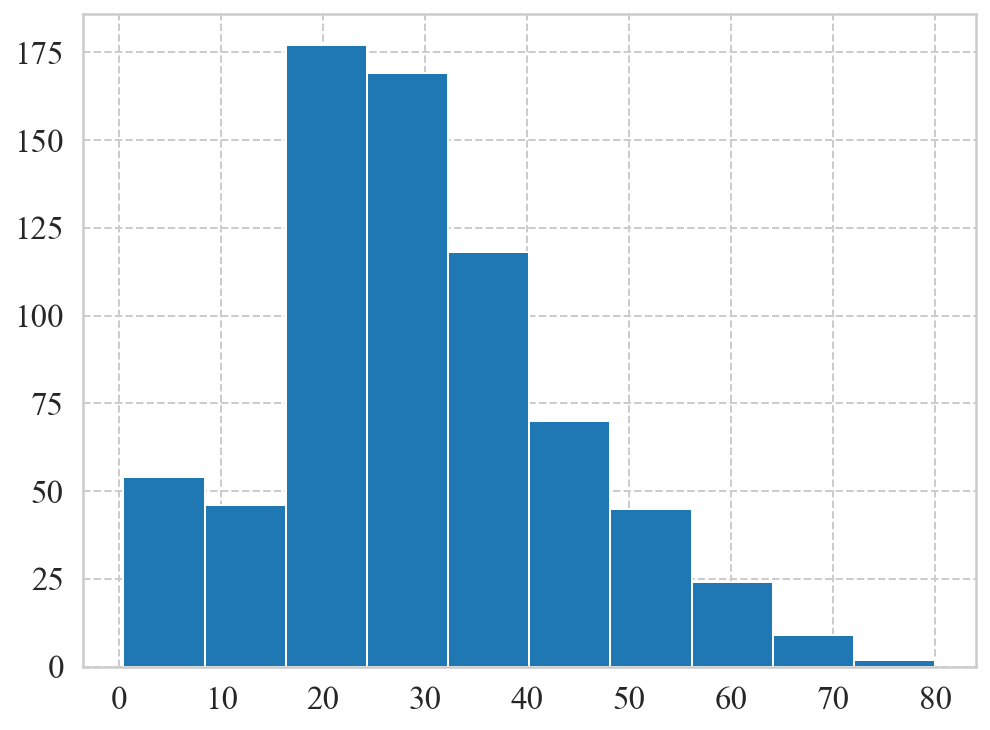

SibSp


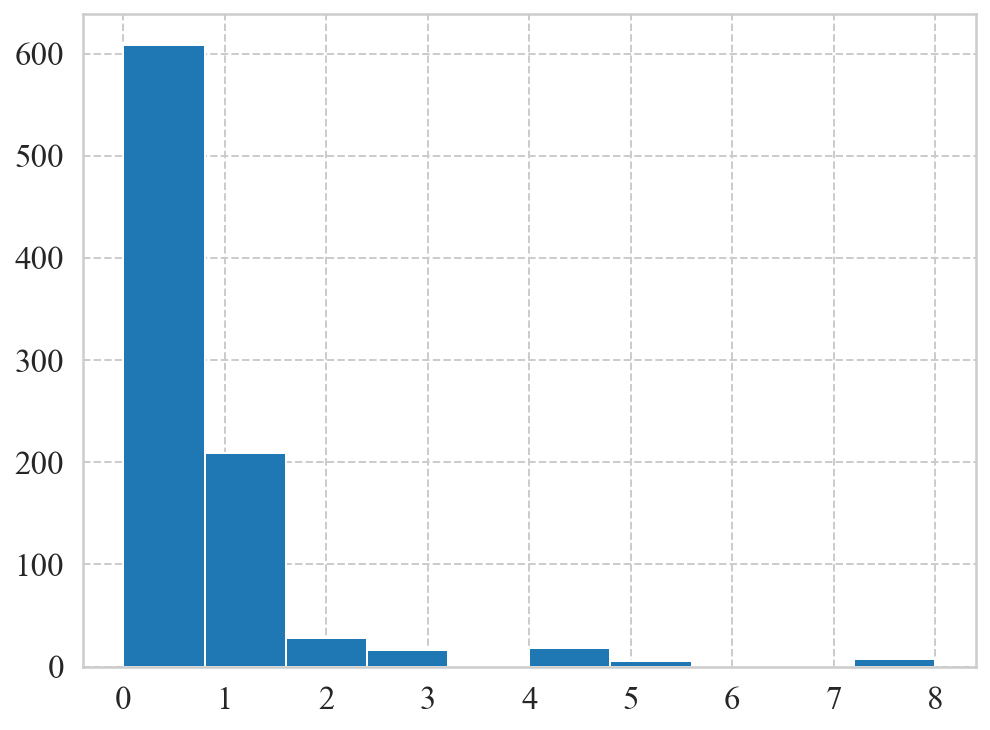

Parch


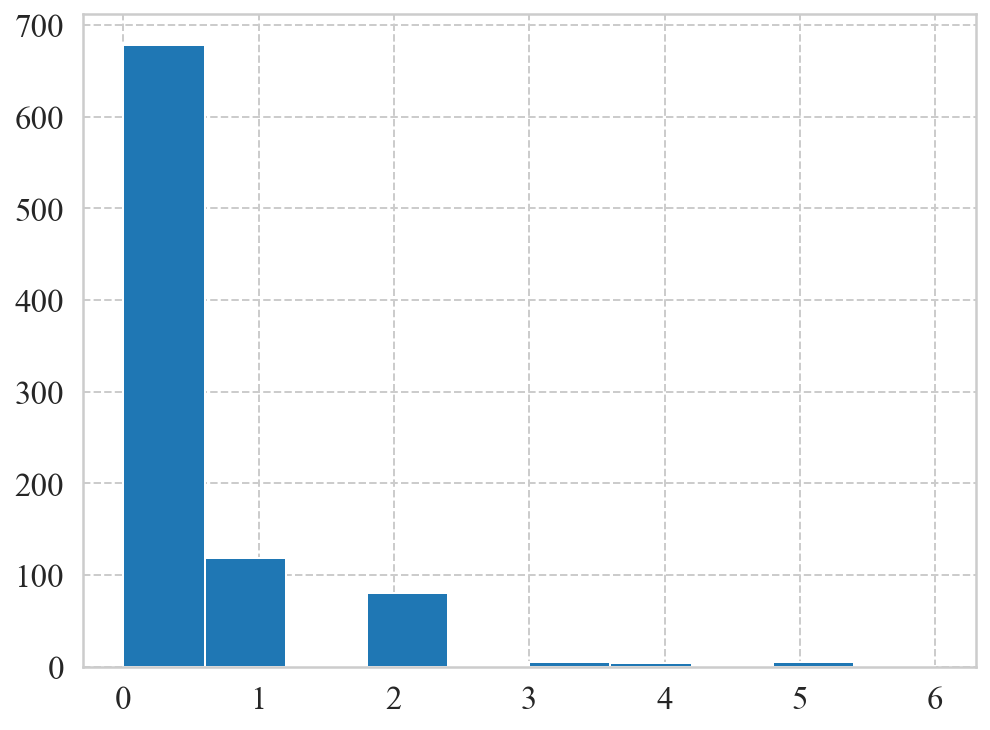

Fare


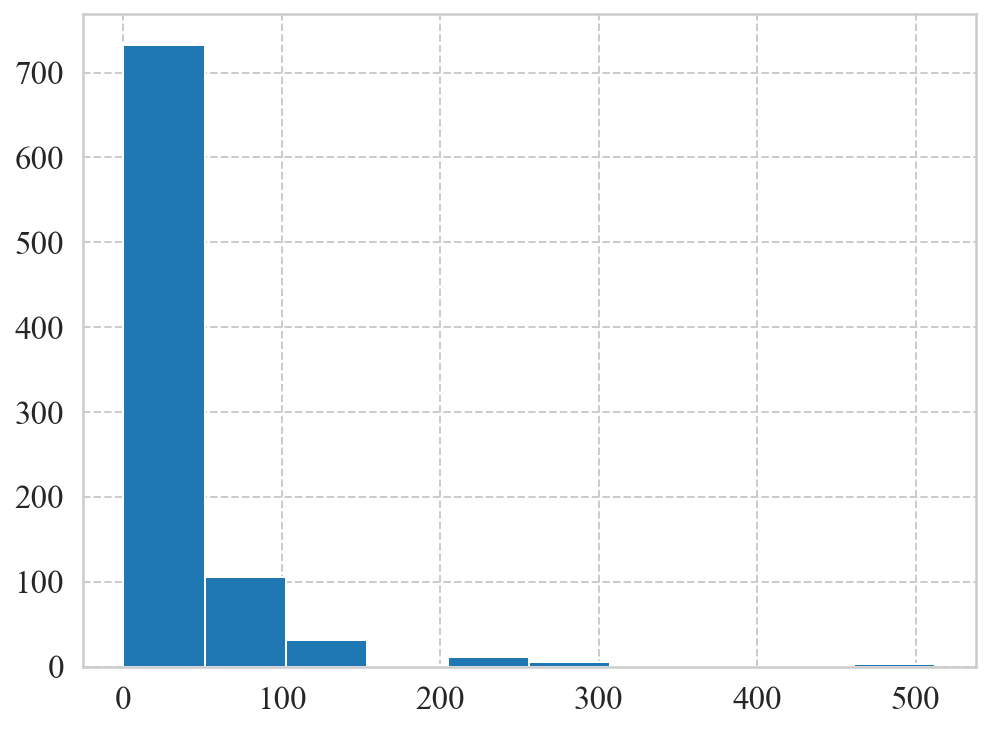

In [14]:
for column in train.select_dtypes(exclude='object'):
    print(column)
    plt.hist(x=column, data=train)
    plt.show()

Sex


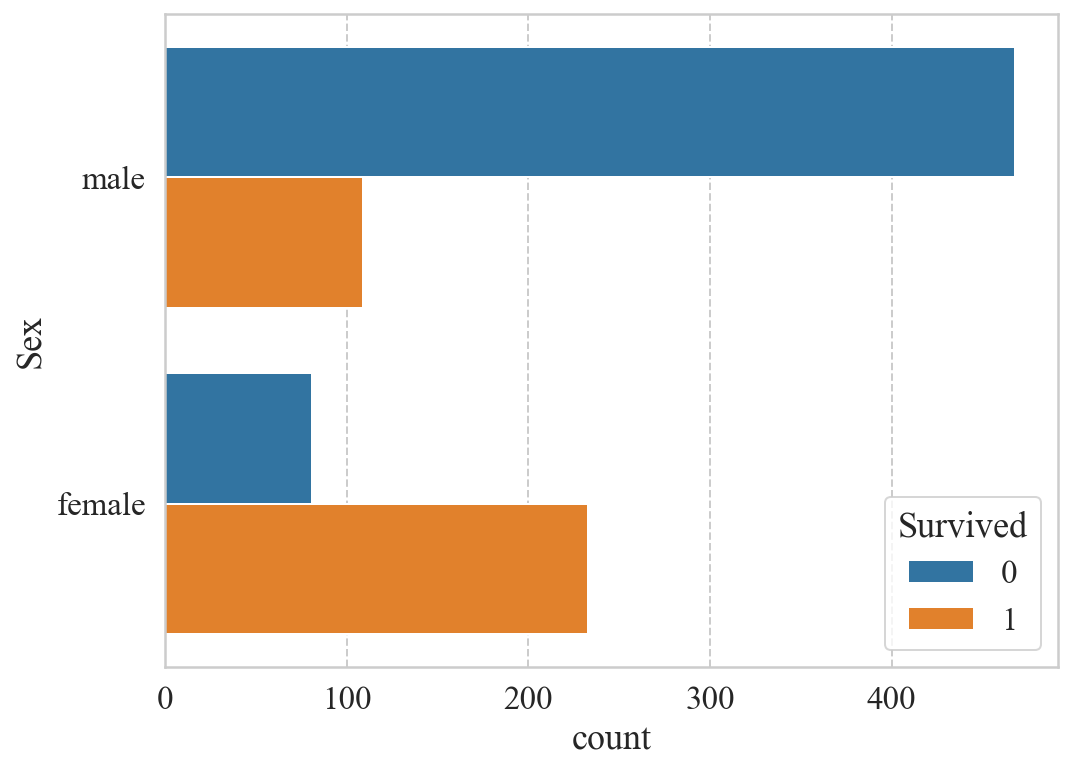

Embarked


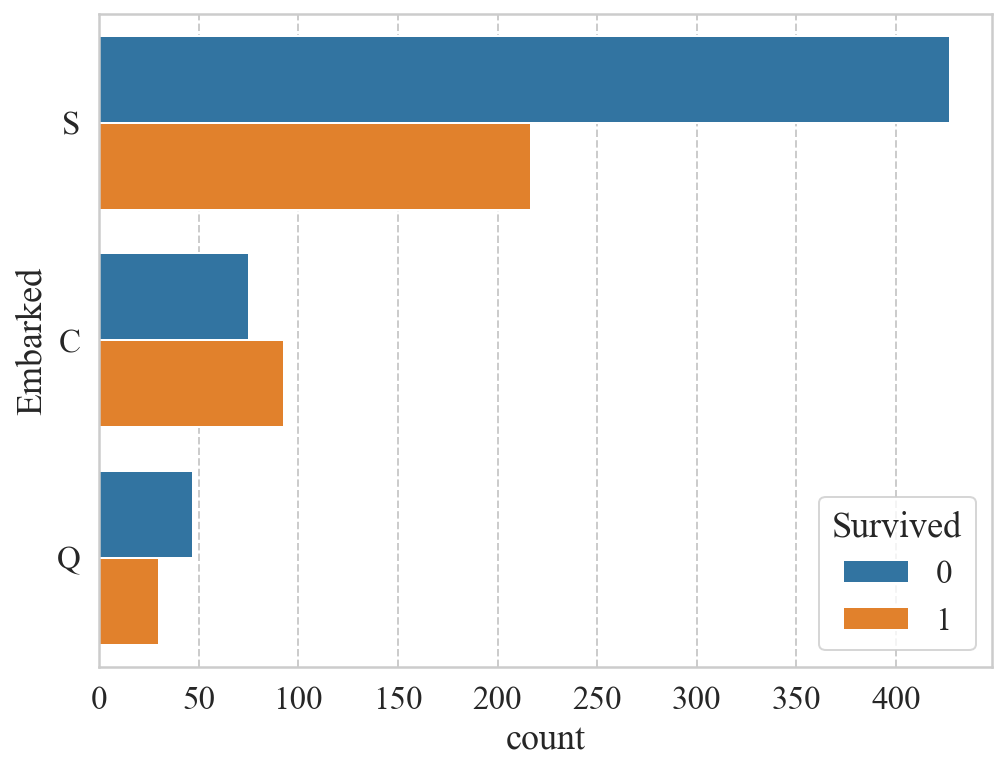

In [15]:
for column in train.select_dtypes(include='object'):
    if train[column].nunique() < 10:
        print(column)
        sns.countplot(y=column, data=train, hue='Survived')
        plt.show()

Survived


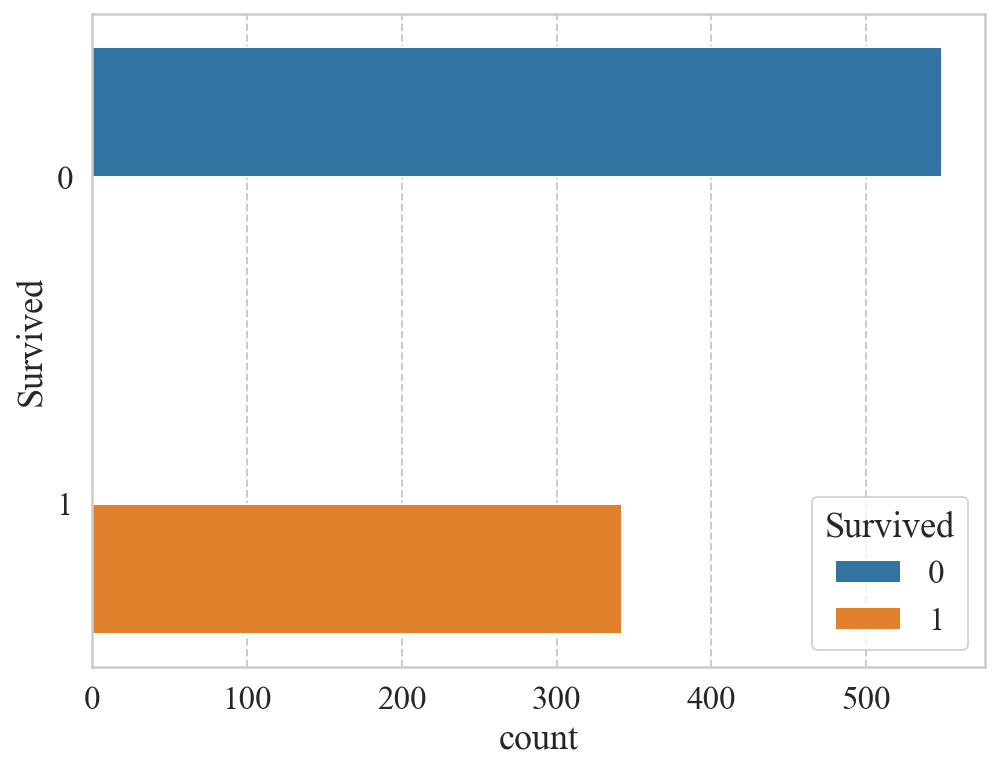

Pclass


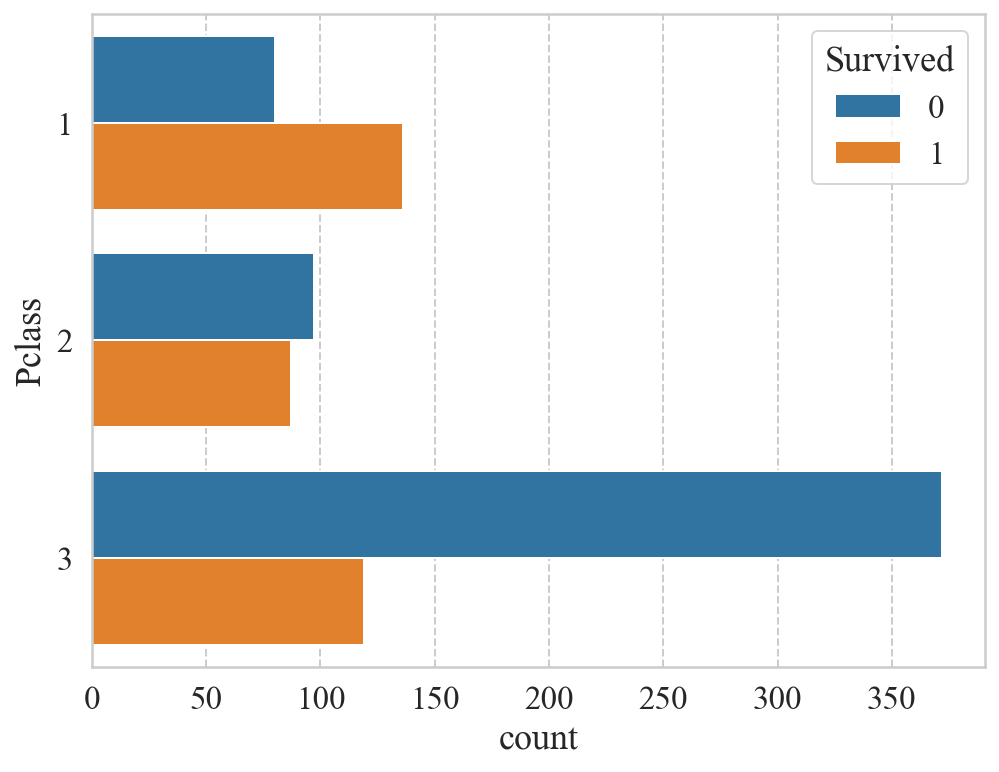

SibSp


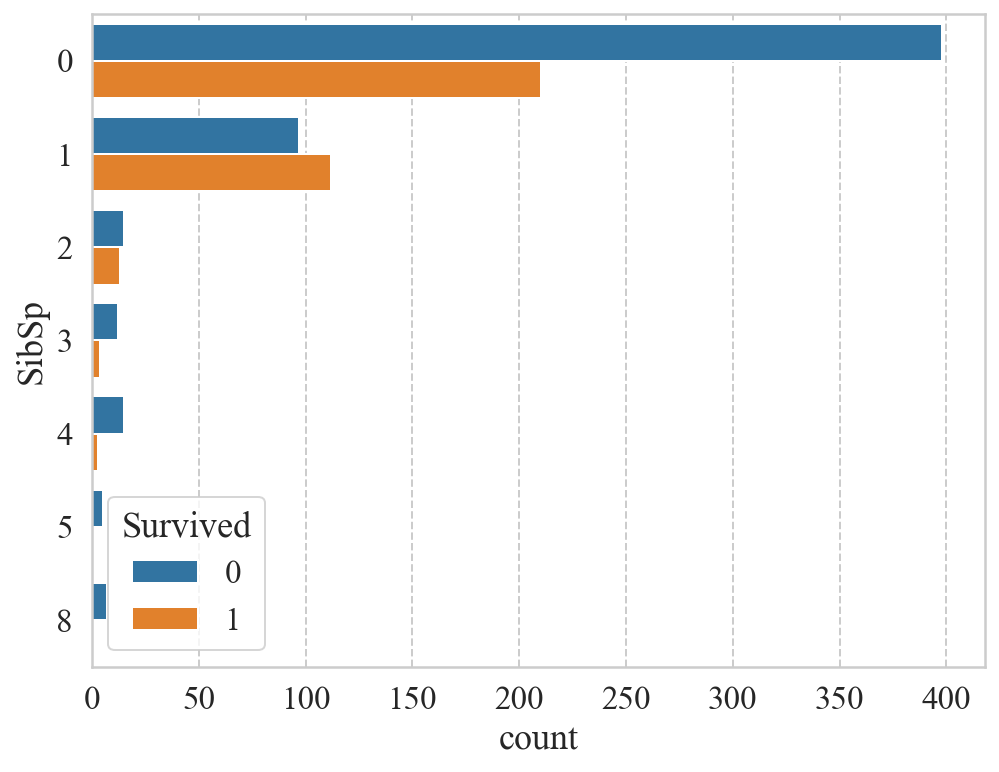

Parch


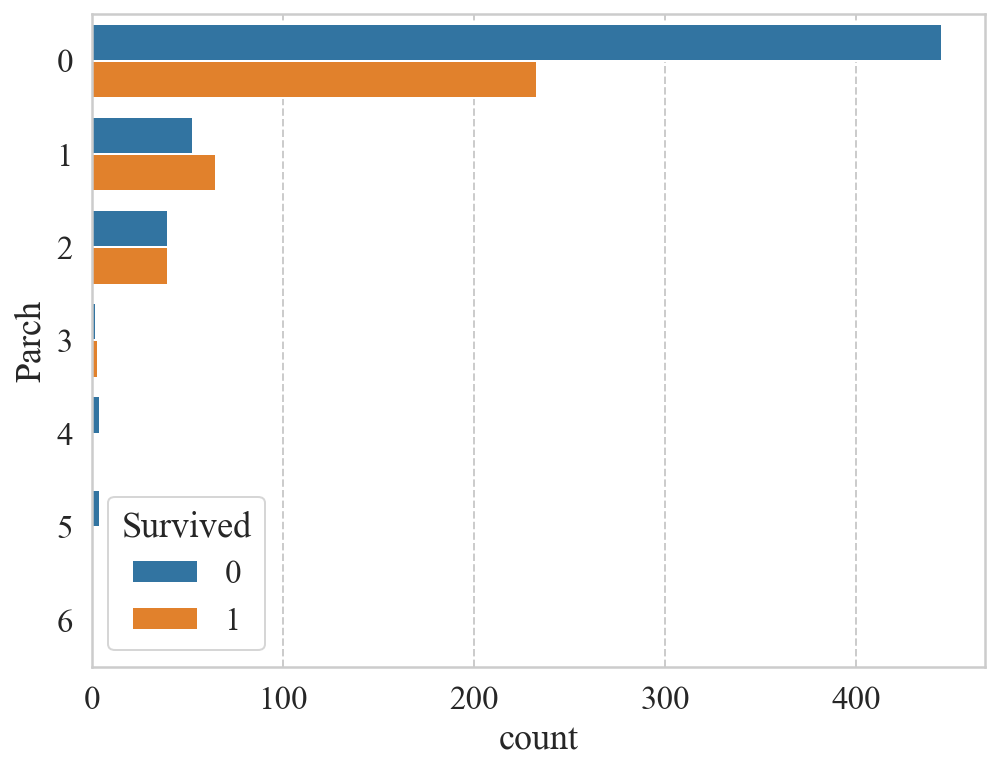

In [16]:
for column in train.select_dtypes(exclude='object'):
    if train[column].nunique() < 10:
        print(column)
        sns.countplot(y=column, data=train, hue='Survived')
        plt.show()

## 4.Data cleaning 

#TODO:
- Fare check
- Maybe something from ticket?

Sources:
https://www.kaggle.com/code/startupsci/titanic-data-science-solutions

In [17]:
def filling_embarked(df):
    """
    Filling nulls with most common existing port
    
    Input: dataset
    Output: dataset with filled Embarked column
    """
    
    mode_port = df.Embarked.dropna().mode()[0]
    df['Embarked'] = df['Embarked'].fillna(mode_port)
    
    return df

filling_embarked(train)
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [18]:
def filling_nulls(df):
    '''
    Filling the nans in Age columns with median for Class and Sex.
    
    Input: Dataframe
    Output: Dataframe with filled NaNs
    '''
    
    for i in df.Sex.unique():
        for y in df.Pclass.unique():
            age = df[(df['Sex'] == i) & (df['Pclass'] == y)]['Age'].dropna().median()
            fare = df[(df['Sex'] == i) & (df['Pclass'] == y)]['Fare'].dropna().median()
            df.loc[(df['Age'].isna()) & (df['Sex'] == i) & (df['Pclass'] == y),'Age'] = age
            df.loc[(df['Fare'].isna()) & (df['Sex'] == i) & (df['Pclass'] == y),'Fare'] = fare
            
    
    return df

filling_nulls(train)
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [19]:
#Cabins

def cabin_clean(df):
    """
    When ticket had a cabin assigned, then value is 1, else is 0
    
    Input: DF
    Output: DF
    """
    df['Cabin'] = df['Cabin'].str.replace('\d+', '', regex=True).str[0]
    df['Cabin'] = df['Cabin'].where(df['Cabin'].isnull(), 1).fillna(0)
    
    return df

cabin_clean(train)
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare  Cabin Embarked  
0      0         A/5 21171   7.2500      0        S  
1      0          PC 17599  71.2833      1        C  
2      0  STON/O2. 3101282   7.9250      0        S  
3      0            113803  53.1000      1        S  
4      0            373450   8.0500      0        S

In [20]:
### Title from Names

def titles_from_names(df):
    """
    Dataset has interesting parts of passenger names. 
    Let's take Male and Female names and also "Noble" Titles including scientific and army degrees ones.
    
    Input:
    Dataset with Titles
    
    Output:
    Dataset with segmented title data.
    """
    
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Master', 'Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Noble_Title')
    df['Title'] = df['Title'].replace(['Mlle', 'Ms','Mme', 'Miss', 'Mrs'], 'Female_Title')
    df['Title'] = df['Title'].replace('Mr', 'Male_Title')
    
    
    
    return df

titles_from_names(train)
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare  Cabin Embarked         Title  
0      0         A/5 21171   7.2500      0        S    Male_Title  
1      0          PC 17599  71.2833      1        C  Female_Title  
2      0  STON/O2. 3101282   7.9250      0        S  Female_Title  
3      0            113803  53.1000      1        S  Female_Title  
4      0            373450   8.0500      0        S    Male_Title

In [21]:


def dataset_mapping(df):
    """ 
    For Model Simplicity let's map passengers Sex, Age and Fare
    
    Output:
    df with segmented Sex, Age and Fare
    """
    
    sex_mapping = {'female': 1, 'male': 0}
    df['Sex'] = df['Sex'].replace(sex_mapping)

    df.loc[df['Age'] <= 16, 'Age'] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
    df.loc[df['Age'] > 64, 'Age'] = 4
    df.Age = df.Age.astype(int)

    
    df.loc[ df['Fare'] <= 7.85, 'Fare'] = 0
    df.loc[(df['Fare'] > 7.85) & (df['Fare'] <= 10.5), 'Fare'] = 1
    df.loc[(df['Fare'] > 10.5) & (df['Fare'] <= 21.68), 'Fare'] = 2
    df.loc[(df['Fare'] > 21.68) & (df['Fare'] <= 39.69), 'Fare'] = 3
    df.loc[ df['Fare'] > 39.69, 'Fare'] = 4
    df.Fare = df.Fare.astype(int)
    
                                                                            
    
    return df

dataset_mapping(train)

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex  Age  SibSp  \
0                              Braund, Mr. Owen Harris    0    1      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1    2      1   
2                               Heikkinen, Miss. Laina    1    1      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1    2      1   
4                             Allen, Mr. William Henry    0    2      0   
..                                                 ...  ...  ...    ...   
886                              Montvila, Rev. Juozas    0    1      0   
887                       Graham, Miss. Margaret Edith    1    1      0   
888           Johnston, Miss. Catherine Helen "Carrie"    1    1      1   
889                              Behr, Mr. Karl Howell    0    1      0   
890                                Dooley, Mr. Patrick    0    1      0   

     Parch            Ticket  Fare  Cabin Embarked         Title  
0        0         A/5 21171     0      0        S    Male_Title  
1        0          PC 17599     4      1        C  Female_Title  
2        0  STON/O2. 3101282     1      0        S  Female_Title  
3        0            113803     4      1        S  Female_Title  
4        0            373450     1      0        S    Male_Title  
..     ...               ...   ...    ...      ...           ...  
886      0            211536     2      0        S   Noble_Title  
887      0            112053     3      1        S  Female_Title  
888      2        W./C. 6607     3      0        S  Female_Title  
889      0            111369     3      1        C    Male_Title  
890      0            370376     0      0        Q    Male_Title  

[891 rows x 13 columns]

In [22]:
def dummies(df):
    """
    Change categorical data to Dummies
    """
    port_dum = pd.get_dummies(df.Embarked, prefix='Port')
    df = df.join(port_dum)
    titles_dum = pd.get_dummies(df.Title, prefix='Title')
    df = df.join(titles_dum)
    
    return df

train = dummies(train)

train = train.drop(['Ticket', 'Name', 'Embarked', 'Title'], axis=1)
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Cabin  Port_C  \
0            1         0       3    0    1      1      0     0      0       0   
1            2         1       1    1    2      1      0     4      1       1   
2            3         1       3    1    1      0      0     1      0       0   
3            4         1       1    1    2      1      0     4      1       0   
4            5         0       3    0    2      0      0     1      0       0   

   Port_Q  Port_S  Title_Female_Title  Title_Male_Title  Title_Noble_Title  
0       0       1                   0                 1                  0  
1       0       0                   1                 0                  0  
2       0       1                   1                 0                  0  
3       0       1                   1                 0                  0  
4       0       1                   0                 1                  0

## 5. Final Cleaning Function

In [23]:
def cleaning_function(df):
    df = filling_embarked(df)
    df = filling_nulls(df)
    df = cabin_clean(df)
    df = titles_from_names(df)
    df = dataset_mapping(df)
    df = dummies(df)
    
    return df

In [24]:
#Loading both datasets
train_df = pd.read_csv('../Jupyter Notebook/data/train.csv')
train = train_df.copy()


train = cleaning_function(train)
train = train.drop(['Ticket', 'PassengerId', 'Embarked', 'Name', 'Title'], axis=1)


#Loading both datasets
test_df = pd.read_csv('../Jupyter Notebook/data/test.csv')
test = test_df.copy()

test = cleaning_function(test)
test = test.drop(['Ticket', 'PassengerId', 'Embarked', 'Name', 'Title'], axis=1)

In [25]:
train.head()

Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Cabin  Port_C  Port_Q  \
0         0       3    0    1      1      0     0      0       0       0   
1         1       1    1    2      1      0     4      1       1       0   
2         1       3    1    1      0      0     1      0       0       0   
3         1       1    1    2      1      0     4      1       0       0   
4         0       3    0    2      0      0     1      0       0       0   

   Port_S  Title_Female_Title  Title_Male_Title  Title_Noble_Title  
0       1                   0                 1                  0  
1       0                   1                 0                  0  
2       1                   1                 0                  0  
3       1                   1                 0                  0  
4       1                   0                 1                  0

In [26]:
test.head()

Pclass  Sex  Age  SibSp  Parch  Fare  Cabin  Port_C  Port_Q  Port_S  \
0       3    0    2      0      0     0      0       0       1       0   
1       3    1    2      1      0     0      0       0       0       1   
2       2    0    3      0      0     1      0       0       1       0   
3       3    0    1      0      0     1      0       0       0       1   
4       3    1    1      1      1     2      0       0       0       1   

   Title_Female_Title  Title_Male_Title  Title_Noble_Title  
0                   0                 1                  0  
1                   1                 0                  0  
2                   0                 1                  0  
3                   0                 1                  0  
4                   1                 0                  0

## 6. Algorithm Assignment

In [27]:
x_train = train.drop("Survived", axis=1)
y_train = train["Survived"]
x_test  = test.copy()

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

81.82

## 7. Model Outcome and gathering the findings

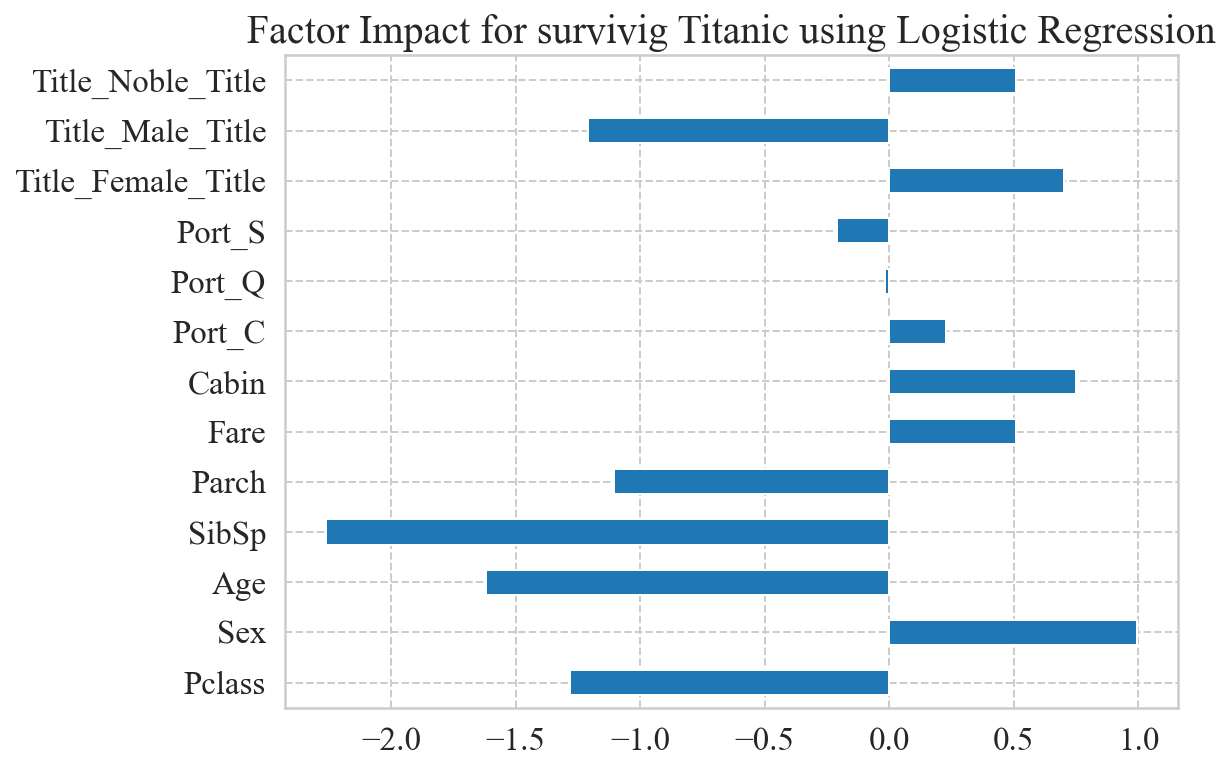

In [28]:
min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_test_minmax = min_max_scaler.transform(x_test)

log_reg= LogisticRegression()
log_reg.fit(x_train_minmax,y_train)
y_pred=log_reg.predict(x_test_minmax)

pd.Series(log_reg.coef_[0], index=x_train.columns).plot(kind='barh').set_title('Factor Impact for survivig Titanic using Logistic Regression', fontsize=20);


Survived


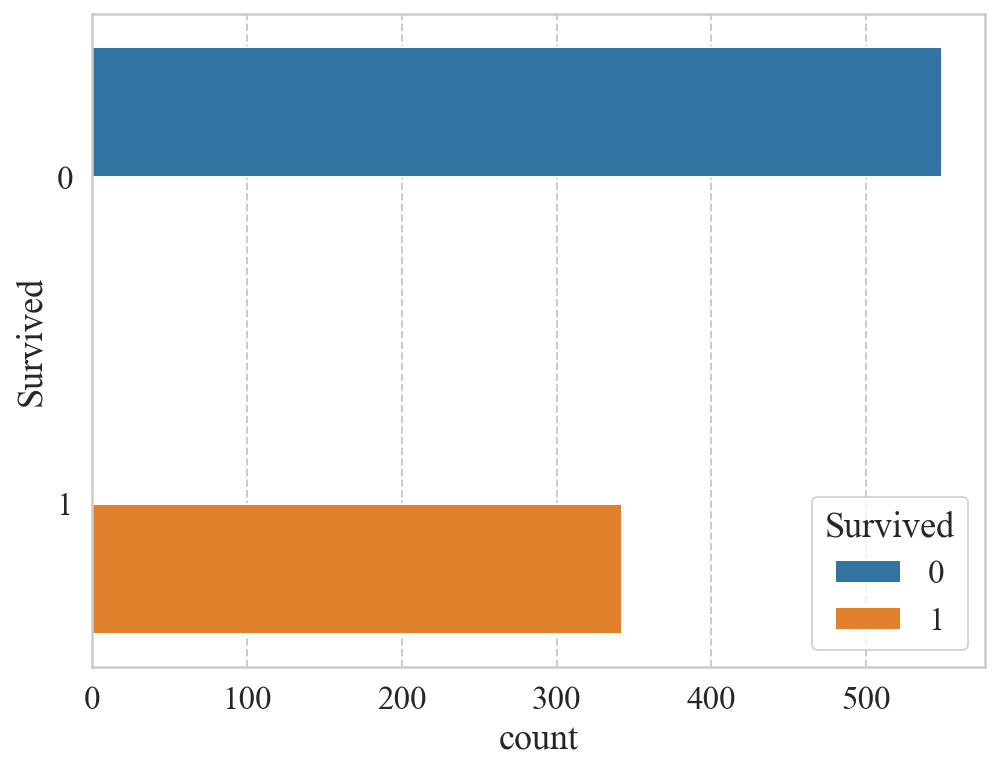

Pclass


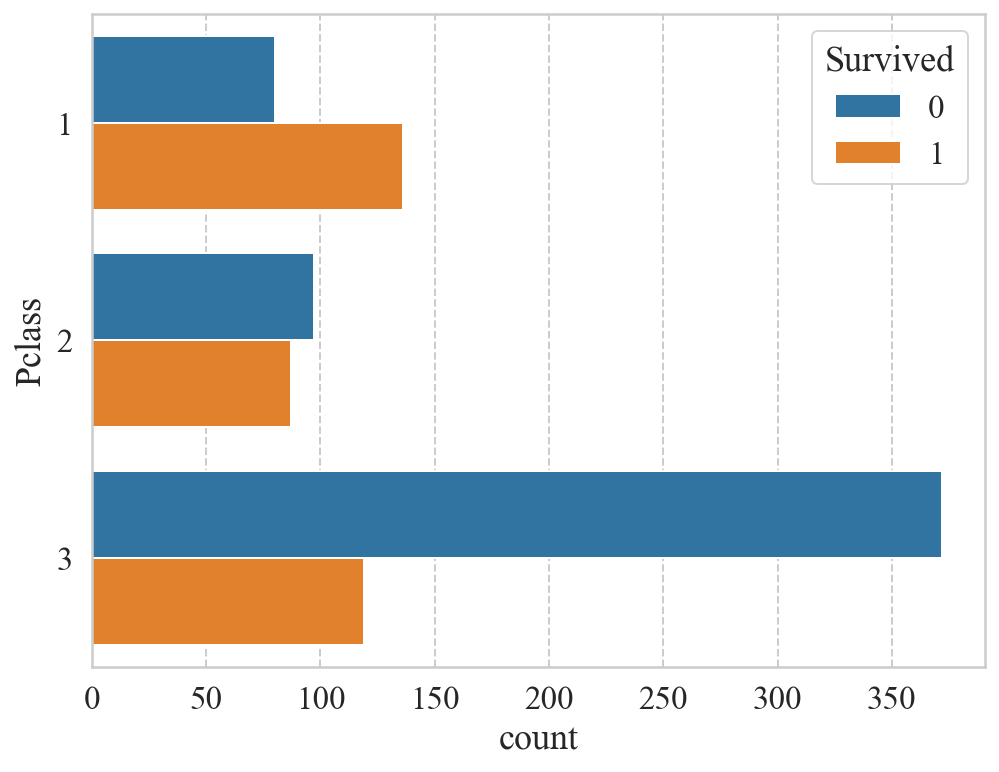

Sex


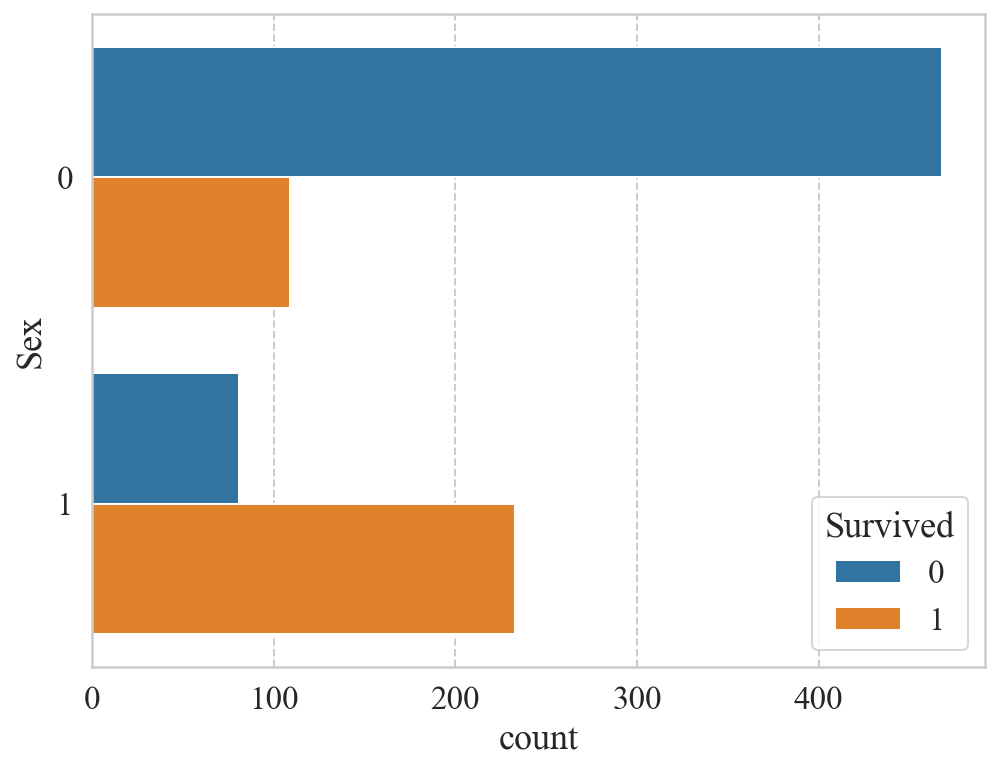

Age


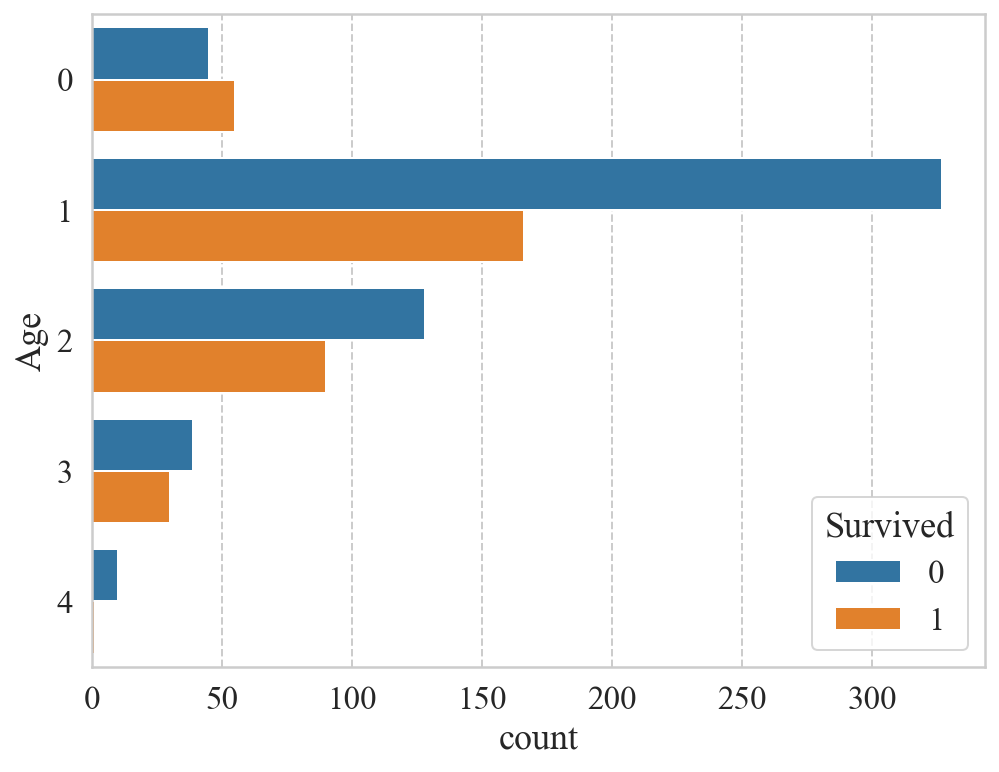

SibSp


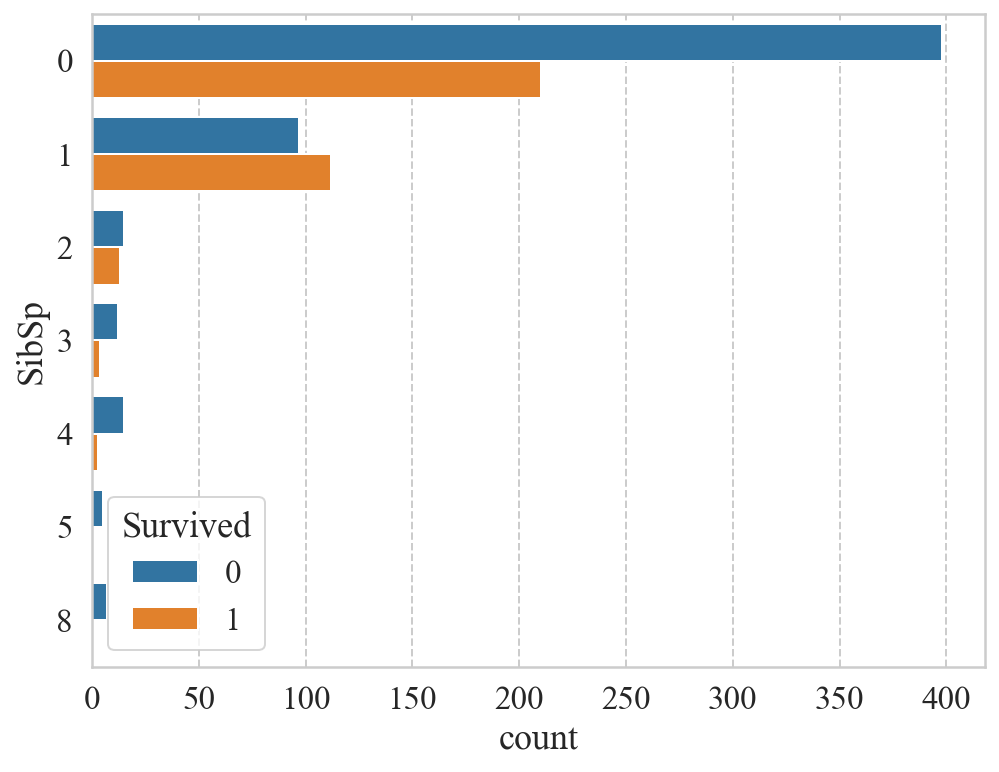

Parch


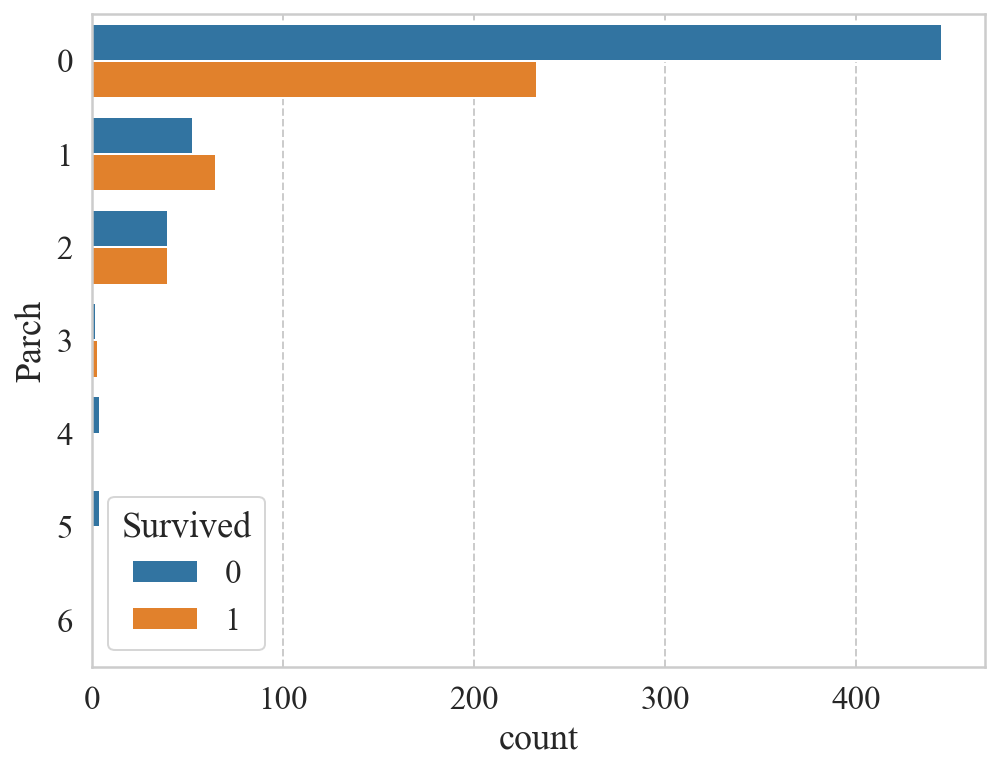

Fare


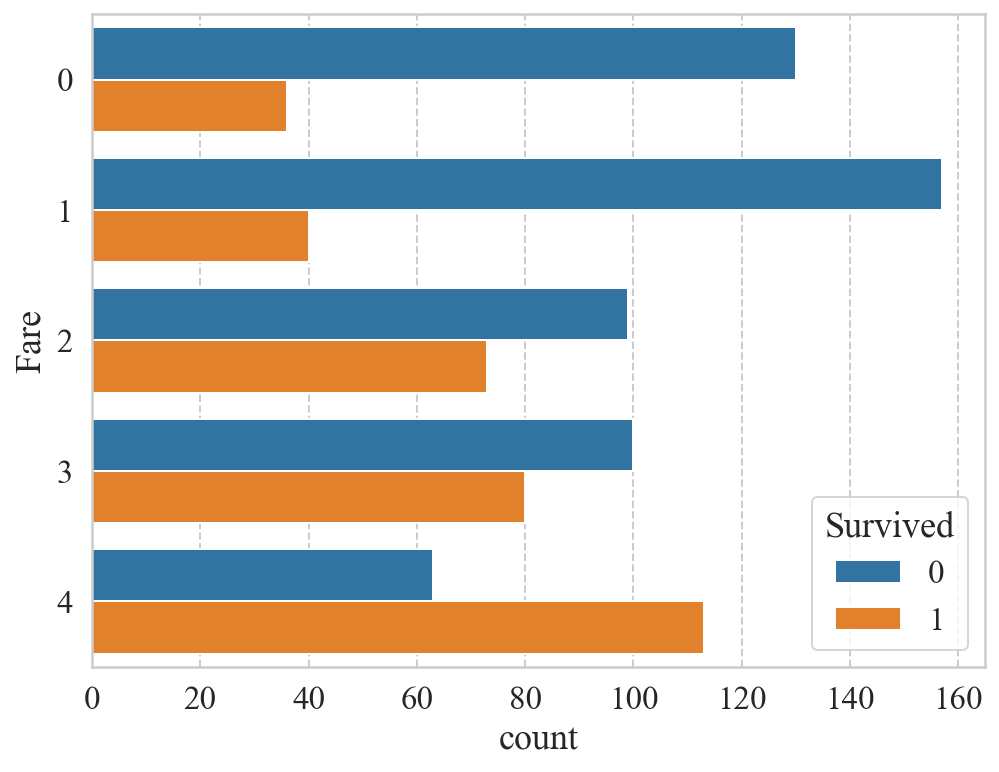

Cabin


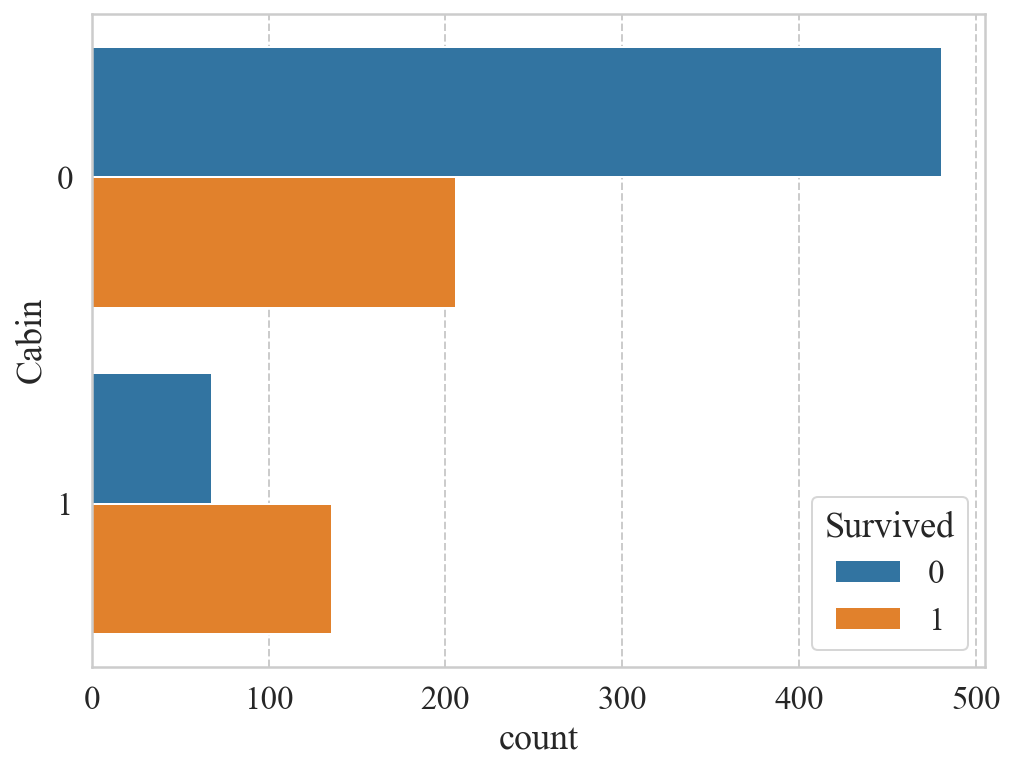

Port_C


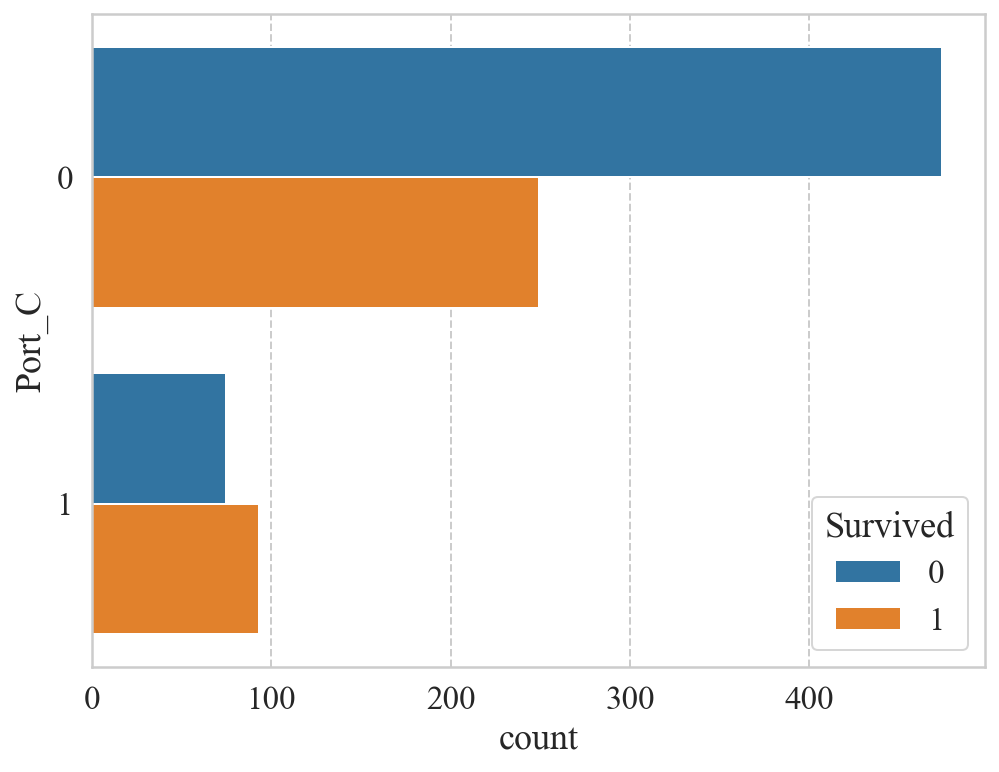

Port_Q


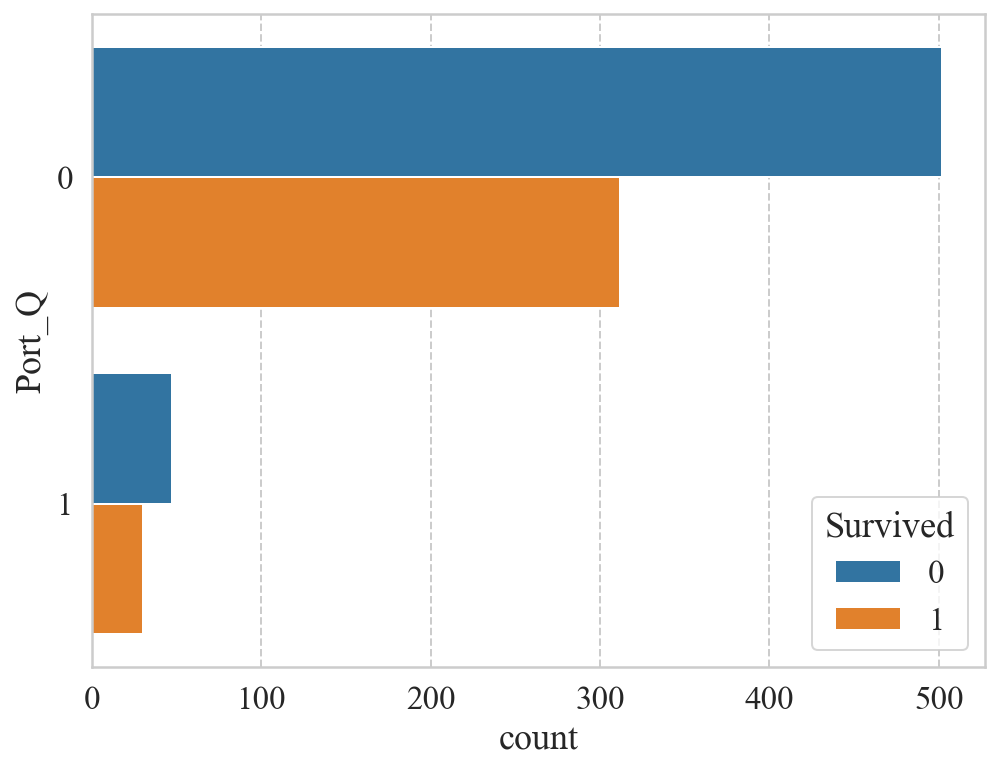

Port_S


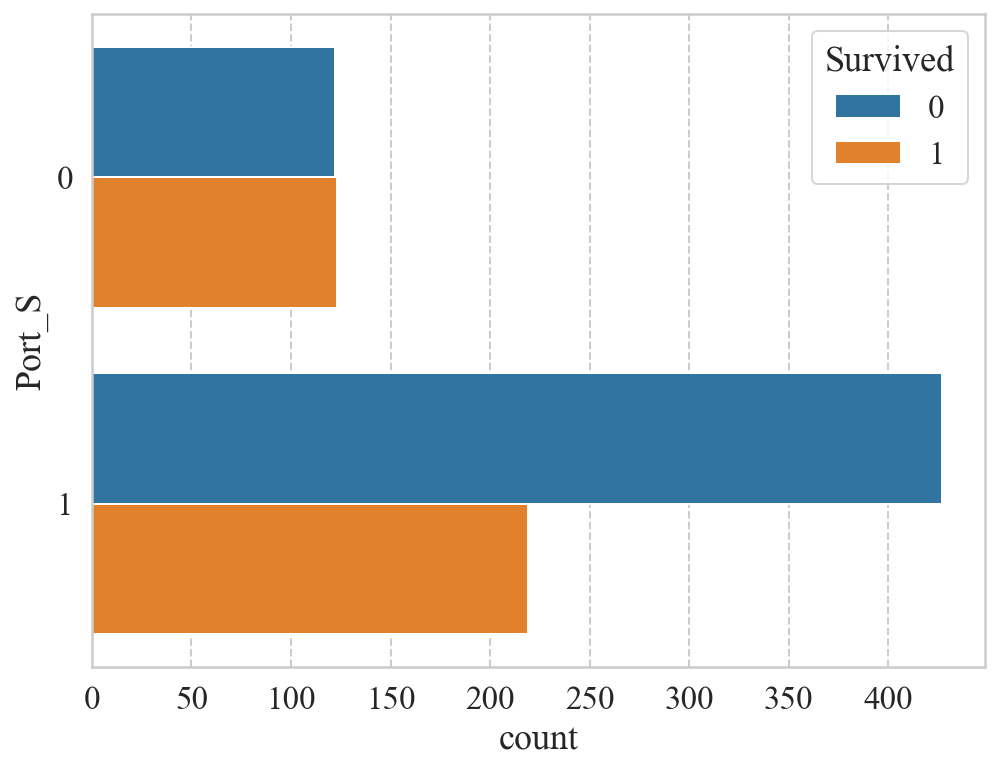

Title_Female_Title


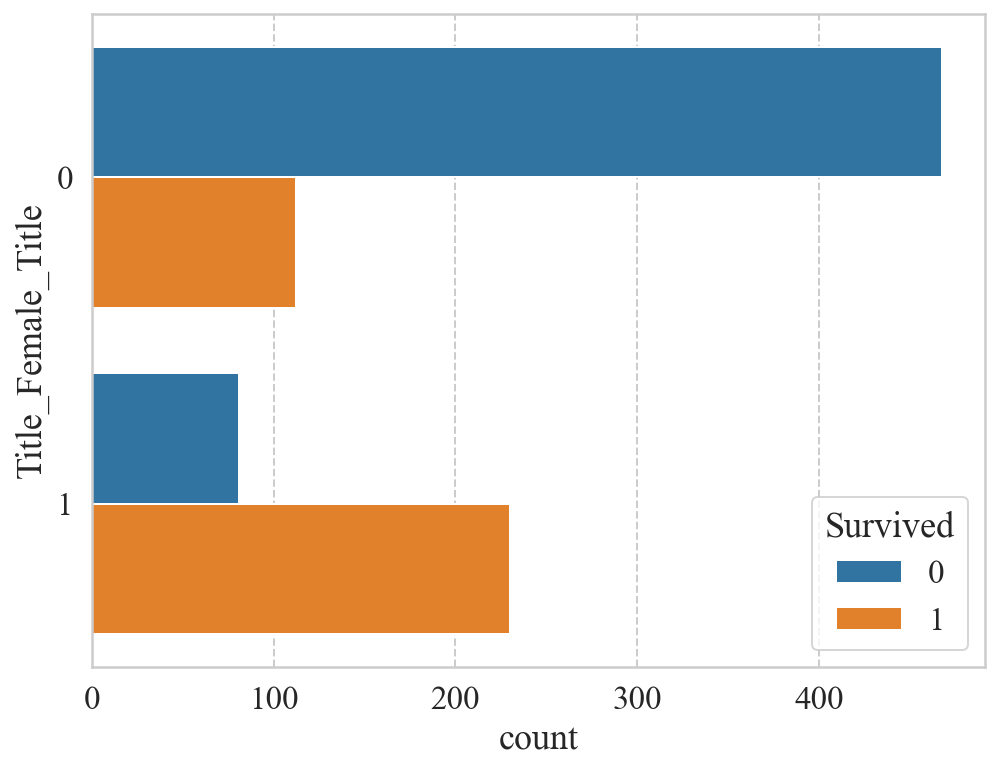

Title_Male_Title


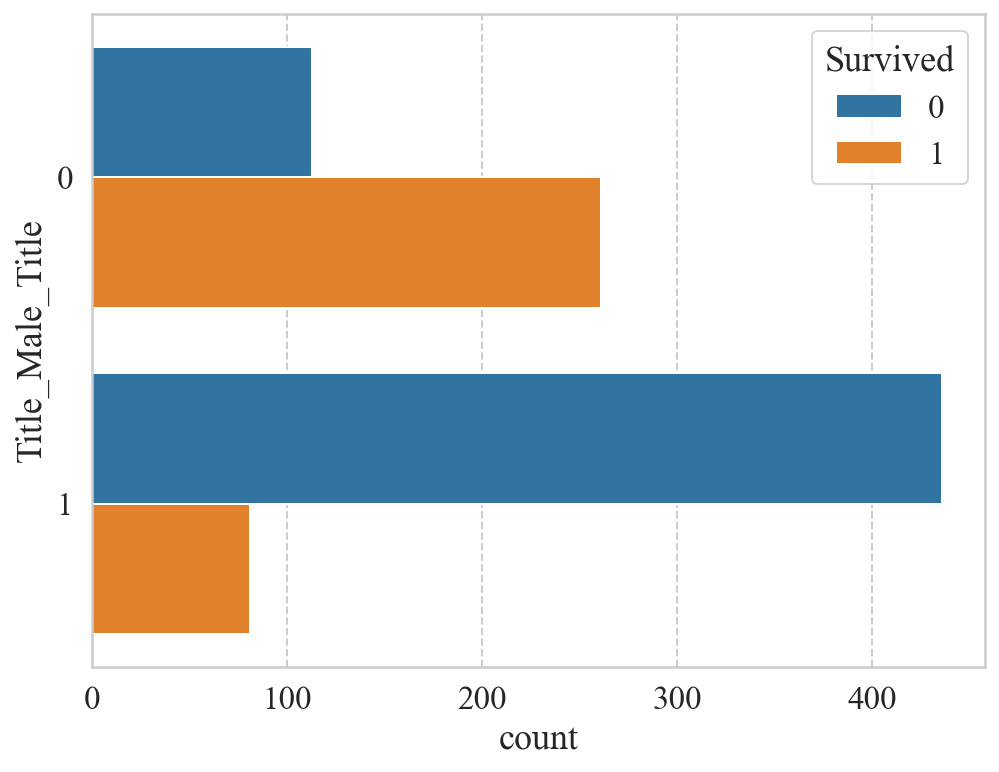

Title_Noble_Title


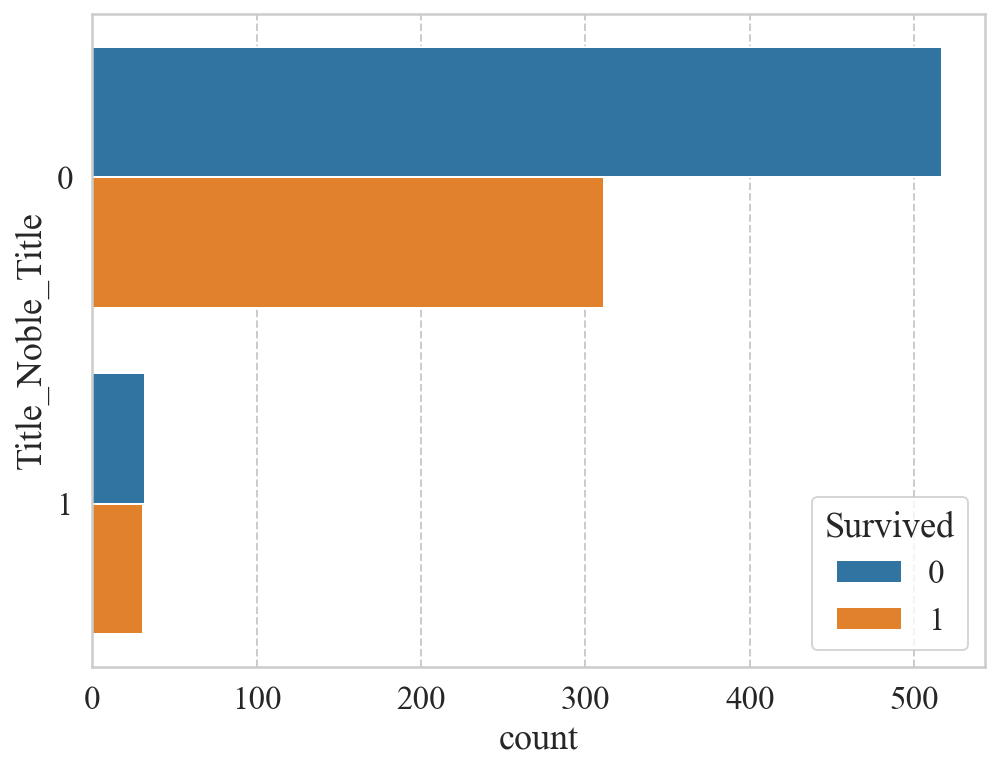

In [29]:
for column in train.select_dtypes(exclude='object'):
    if train[column].nunique() < 10:
        print(column)
        sns.countplot(y=column, data=train, hue='Survived')
        plt.show()

## 8. Merging datasets to one

In [30]:
results = pd.DataFrame({
        "Survived": Y_pred
    })

train_df = pd.read_csv('../Jupyter Notebook/data/train.csv')
test_df = pd.read_csv('../Jupyter Notebook/data/test.csv')

In [31]:
cols = train_df.columns.tolist()

In [32]:
test_merged = pd.concat([test_df, results], axis=1, join='inner').reset_index(drop=True)
test_merged = test_merged[cols]
final_results = pd.concat([train_df, test_merged])
final_results

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
413                                 Spector, Mr. Woolf    male   NaN      0   
414                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
415                       Saether, Mr. Simon Sivertsen    male  38.5      0   
416                                Ware, Mr. Frederick    male   NaN      0   
417                           Peter, Master. Michael J    male   NaN      1   

     Parch              Ticket      Fare Cabin Embarked  
0        0           A/5 21171    7.2500   NaN        S  
1        0            PC 17599   71.2833   C85        C  
2        0    STON/O2. 3101282    7.9250   NaN        S  
3        0              113803   53.1000  C123        S  
4        0              373450    8.0500   NaN        S  
..     ...                 ...       ...   ...      ...  
413      0           A.5. 3236    8.0500   NaN        S  
414      0            PC 17758  108.9000  C105        C  
415      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416      0              359309    8.0500   NaN        S  
417      1                2668   22.3583   NaN        C  

[1309 rows x 12 columns]

## 9. Saving to CSV

In [33]:
final_results.to_csv('../Jupyter Notebook/results/final_results.csv') 

## 10. Final Answer